In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_no.         400 non-null    int64  
 1   gre_score          400 non-null    int64  
 2   toefl_score        400 non-null    int64  
 3   university_rating  400 non-null    int64  
 4   sop                400 non-null    float64
 5   lor                400 non-null    float64
 6   cgpa               400 non-null    float64
 7   research           400 non-null    int64  
 8   chance_of_admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Decision Tree for Classification

In [5]:
# Create binary class, chance of admit>0.8 -> success

X = df.loc[:, 'gre_score': 'research']
y = df['chance_of_admit']>=0.8

In [8]:
y.head()

0     True
1    False
2    False
3     True
4    False
Name: chance_of_admit, dtype: bool

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.925
0.925


In [20]:
x_train.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research'],
      dtype='object')

[Text(0.4, 0.8333333333333334, 'cgpa <= 8.845\ngini = 0.443\nsamples = 320\nvalue = [214, 106]\nclass = unlikely admit'),
 Text(0.2, 0.5, '0.099\n210\n[199, 11]\nunlikely admit'),
 Text(0.6, 0.5, 'gre_score <= 313.5\n0.236\n110\n[15, 95]\nlikley admit'),
 Text(0.4, 0.16666666666666666, '0.0\n4\n[4, 0]\nunlikely admit'),
 Text(0.8, 0.16666666666666666, '0.186\n106\n[11, 95]\nlikley admit')]

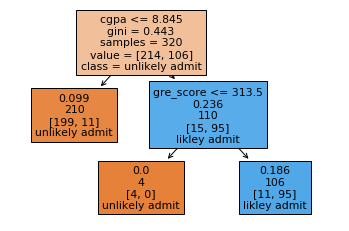

In [23]:
tree.plot_tree(dt, feature_names = x_train.columns, max_depth = 3, class_names = ['unlikely admit', 'likley admit'],
               label='root', filled=True)

In [24]:
print(tree.export_text(dt, feature_names = x_train.columns.tolist()))

|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True



### Verify the split criteria

In [27]:
def gini(data):
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize = True)**2)

gi = gini(y_train)
gi

0.44304687500000006

gini = 0.443, same as the root of tree above

In [28]:
def info_gain(left, right, current_impurity):
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w*gini(left) - (1-w)*gini(right)

In [29]:
info_gain_list = []

for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    
    info_gain_list.append([i, info_gain(left, right, gi)])

In [30]:
ig_table = pd.DataFrame(info_gain_list, columns = ['split_value', 'info_gain']).sort_values('info_gain', ascending=False)

ig_table.head()

,split_value,info_gain
10,8.84,0.296932
124,8.85,0.291464
139,8.88,0.290704
18,8.90,0.290054
98,8.83,0.287810


split_value = 8.84 for highest info gain

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'info gain')

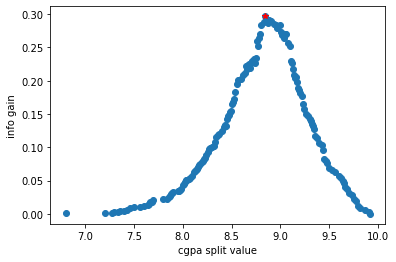

In [32]:
import matplotlib.pyplot as plt

plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

# Decision Tree for Regression

In [33]:
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

dtr = DecisionTreeRegressor(max_depth = 3, ccp_alpha=0.001)
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

score = dtr.score(x_test, y_test)
score

0.5230242793515549

[Text(0.5, 0.8333333333333334, 'cgpa <= 8.845\nsquared_error = 0.021\nsamples = 320\nvalue = 0.727'),
 Text(0.25, 0.5, 'cgpa <= 8.035\nsquared_error = 0.012\nsamples = 210\nvalue = 0.651'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.009\nsamples = 60\nvalue = 0.533'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.006\nsamples = 150\nvalue = 0.698'),
 Text(0.75, 0.5, 'cgpa <= 9.195\nsquared_error = 0.005\nsamples = 110\nvalue = 0.872'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.003\nsamples = 55\nvalue = 0.816'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 55\nvalue = 0.928')]

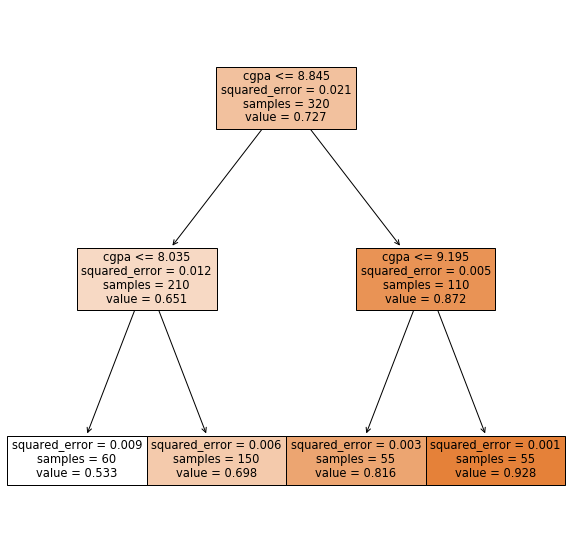

In [49]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtr, feature_names = x_train.columns, max_depth=2, filled=True)

### Verify the split criteria


In [50]:
y_train.mean()

0.7266562499999997

In [53]:
import numpy as np

def mse(data):
    
    return np.mean((data - data.mean())**2)

def mse_gain(left, right, current_mse):
    
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse(left) - (1 - w) * mse(right)

In [55]:
# MSE at root
m = mse(y_train)
m

0.020789756835937492

In [57]:
mse_gain_list = []

for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    mse_gain_list.append([i, mse_gain(left, right, m)])
 
mse_table = pd.DataFrame(mse_gain_list,columns=['split_value', 'info_gain']).sort_values('info_gain',ascending=False)
mse_table.head(10)

,split_value,info_gain
10,8.84,0.011065
96,8.80,0.011037
98,8.83,0.011023
124,8.85,0.010985
125,8.73,0.010939
110,8.87,0.010932
139,8.88,0.010895
1,8.70,0.010894
17,8.76,0.010858
140,8.74,0.010850


/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'info gain')

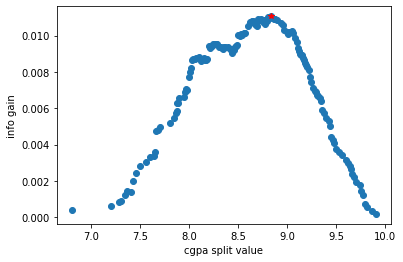

In [58]:
plt.plot(mse_table['split_value'], mse_table['info_gain'],'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

In [59]:
np.unique(dtr.predict(x_train))

array([0.53283333, 0.6976    , 0.81618182, 0.92781818])